In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv(r'C:\Users\RAGHU\Desktop\feeds.csv')

In [4]:
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6
0,2022-11-08T16:28:59+00:00,1,23,82,397,879,206,235
1,2022-11-08T16:29:35+00:00,2,23,82,393,875,237,235
2,2022-11-08T16:30:11+00:00,3,23,82,377,874,224,235
3,2022-11-08T16:30:48+00:00,4,23,82,370,535,82,235
4,2022-11-08T16:31:24+00:00,5,23,83,358,451,215,235
...,...,...,...,...,...,...,...,...
448,2023-04-15T16:40:19+00:00,449,24,59,328,882,256,235
449,2023-04-15T16:41:36+00:00,450,24,59,318,878,320,235
450,2023-04-15T16:42:08+00:00,451,24,59,320,885,313,235
451,2023-04-15T16:42:45+00:00,452,24,59,317,881,345,235


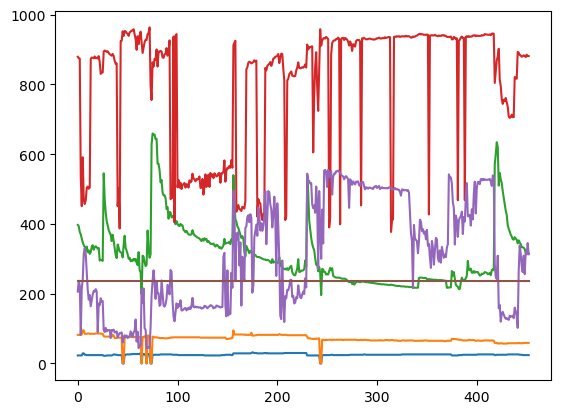

In [5]:
plt.plot(df["field1"])
plt.plot(df["field2"])
plt.plot(df["field3"])
plt.plot(df["field4"])
plt.plot(df["field5"])
plt.plot(df["field6"])

In [6]:
#to make time as stationary
#Augmented Dickey–Fuller test
X = df["field4"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -3.834407
p-value: 0.002574
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Reject Ho - Time Series is Stationary


# Auto Regressive model
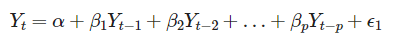

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


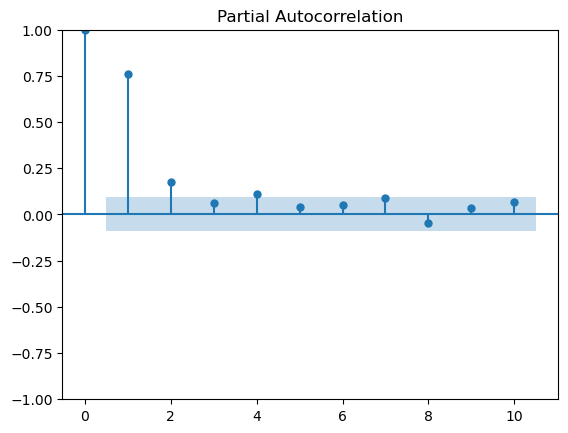

In [7]:
#partial Autocorrelation
plot_pacf(X, lags=10);

In [8]:
#yt is field4 and yt-1 is shifted values
df["Values_shifted"]  = df["field4"].shift()

In [9]:
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6,Values_shifted
0,2022-11-08T16:28:59+00:00,1,23,82,397,879,206,235,NaN
1,2022-11-08T16:29:35+00:00,2,23,82,393,875,237,235,879.0
2,2022-11-08T16:30:11+00:00,3,23,82,377,874,224,235,875.0
3,2022-11-08T16:30:48+00:00,4,23,82,370,535,82,235,874.0
4,2022-11-08T16:31:24+00:00,5,23,83,358,451,215,235,535.0
...,...,...,...,...,...,...,...,...,...
448,2023-04-15T16:40:19+00:00,449,24,59,328,882,256,235,883.0
449,2023-04-15T16:41:36+00:00,450,24,59,318,878,320,235,882.0
450,2023-04-15T16:42:08+00:00,451,24,59,320,885,313,235,878.0
451,2023-04-15T16:42:45+00:00,452,24,59,317,881,345,235,885.0


In [10]:
df.drop('created_at', axis = 1, inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df

,entry_id,field1,field2,field3,field4,field5,field6,Values_shifted
1,2,23,82,393,875,237,235,879.0
2,3,23,82,377,874,224,235,875.0
3,4,23,82,370,535,82,235,874.0
4,5,23,83,358,451,215,235,535.0
5,6,29,95,347,591,241,235,451.0
...,...,...,...,...,...,...,...,...
448,449,24,59,328,882,256,235,883.0
449,450,24,59,318,878,320,235,882.0
450,451,24,59,320,885,313,235,878.0
451,452,24,59,317,881,345,235,885.0


In [13]:
y = df.field4.values
X = df.Values_shifted.values

In [14]:
#train 80% of data
train_size = int(len(X) * 0.80)

In [15]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [16]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.coef_

array([0.76474091])

In [19]:
lr.intercept_

185.44984464828758

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([902.77681834, 904.30630016, 903.54155925, 903.54155925,
       905.07104107, 904.30630016, 905.07104107, 903.54155925,
       903.54155925, 901.24733652, 901.24733652, 901.24733652,
       901.24733652, 902.01207743, 895.89415014, 895.89415014,
       901.24733652, 899.7178547 , 896.65889105, 898.18837288,
       543.34859058, 892.8351865 , 895.12940923, 899.7178547 ,
       902.01207743, 898.95311379, 898.95311379, 543.34859058,
       901.24733652, 902.77681834, 901.24733652, 902.77681834,
       901.24733652, 902.01207743, 902.01207743, 904.30630016,
       904.30630016, 905.07104107, 902.77681834, 904.30630016,
       903.54155925, 903.54155925, 903.54155925, 903.54155925,
       905.07104107, 904.30630016, 905.07104107, 907.3652638 ,
       906.60052289, 906.60052289, 905.83578198, 905.83578198,
       906.60052289, 905.07104107, 908.13000471, 908.89474562,
       908.13000471, 800.30153638, 825.53798641, 850.00969554,
       858.42184555, 875.24614557, 807.18420457, 793.41

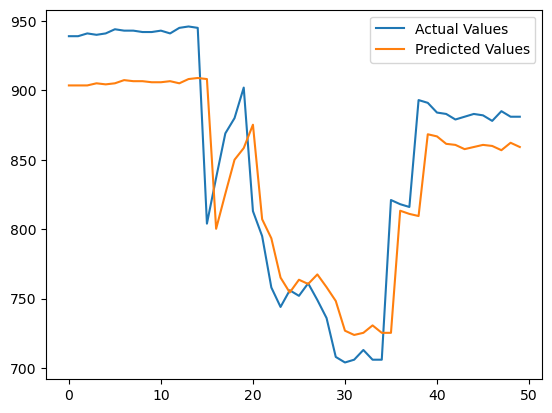

In [21]:
plt.plot(y_test[-50:], label="Actual Values")
plt.plot(y_pred[-50:], label="Predicted Values")
plt.legend()
plt.show()